In [1]:
import sys
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np

# Add the root of the project to the path
source_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(source_path)

In [25]:
source_file="icdar_train_df_20250514_175905.csv"
train_df = pd.read_csv(f"{source_path}\\outputs\\preprocessed_data\\{source_file}")
train_df = file_IO.change_filename_from_to(train_df, fr="old-laptop", to="new-laptop")
r = 0.1
train_df.head()

,writer,isEng,same_text,file_name,male,train,index
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0
1,1,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,1
2,1,1,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,2
3,1,1,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,3
4,2,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,4


In [26]:
train_df_expanded = pd.DataFrame(sum(train_df.apply(image_processing.process_row_body, 
                                                    axis=1,args=(r,)), []))
train_df_expanded.head(10)

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,0,522,2465,1231
1,1,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,1,0,1051,2465,2202
2,1,1,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,2,0,608,2471,1314
3,1,1,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,3,0,1213,2465,2836
4,2,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,4,0,502,2471,1214
5,2,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,5,0,1005,2471,2123
6,2,1,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,6,0,576,2471,1160
7,2,1,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,7,0,1165,2471,2492
8,3,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,8,0,501,2459,1299
9,3,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,9,0,1010,2471,2211


In [27]:
m=1
index_counts = train_df_expanded['index'].value_counts()
all_counts_correct = (index_counts == m).all()
print(f"Each unique index appears {m} times: {all_counts_correct}")
if not all_counts_correct:
    print("Indices with incorrect counts:")
    print(index_counts[index_counts != m])

Each unique index appears 1 times: True


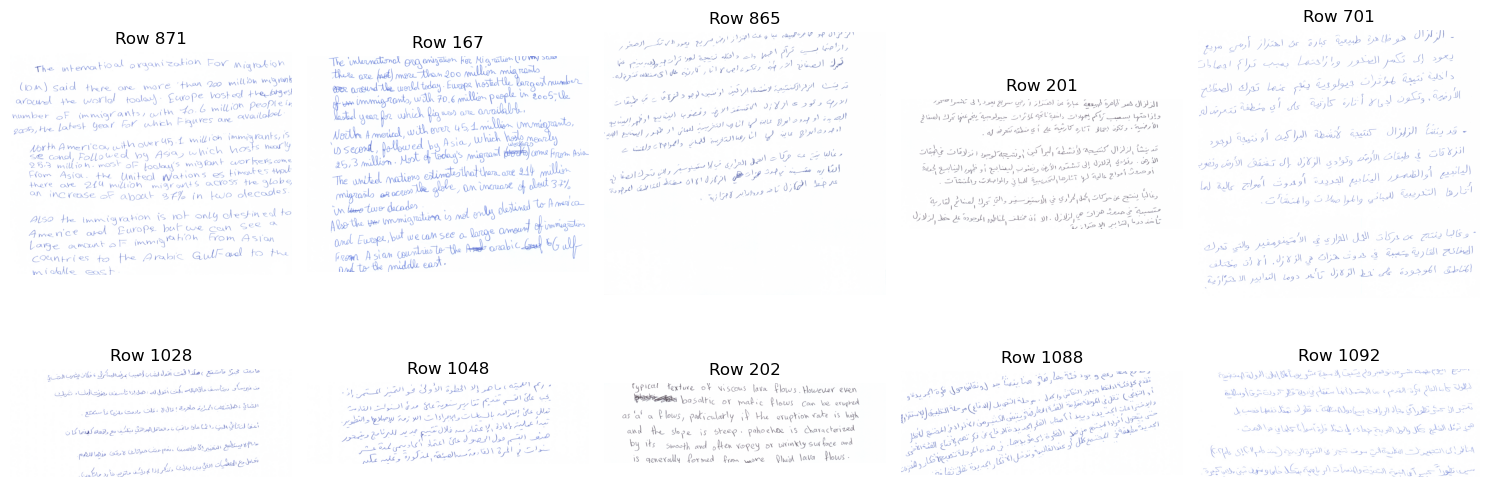

In [28]:
visualization.plot_cropped_sections(train_df_expanded)

In [30]:
# The number of patches per writer, should be 4
print(len(train_df_expanded)/282)
tests.check_randomization(train_df_expanded)
tests.check_grouping(train_df_expanded)
tests.check_occurrences(train_df_expanded,count=4)

4.0
Number of rows where train == 1: 1012
Fraction of rows where train == 1: 0.90
The train column is constant for all writers.
Each unique writer value occurs on exactly 4 rows.


In [31]:
train_df_expanded = train_df_expanded.reset_index(drop=True)
train_df_expanded.head(10)


,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,0,522,2465,1231
1,1,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,1,0,1051,2465,2202
2,1,1,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,2,0,608,2471,1314
3,1,1,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,3,0,1213,2465,2836
4,2,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,4,0,502,2471,1214
5,2,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,5,0,1005,2471,2123
6,2,1,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,6,0,576,2471,1160
7,2,1,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,7,0,1165,2471,2492
8,3,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,8,0,501,2459,1299
9,3,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,9,0,1010,2471,2211


In [32]:
train_df_expanded['index']=train_df_expanded.index
train_df_expanded.head(10)

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2
0,1,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,0,0,522,2465,1231
1,1,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,1,0,1051,2465,2202
2,1,1,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,2,0,608,2471,1314
3,1,1,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,3,0,1213,2465,2836
4,2,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,4,0,502,2471,1214
5,2,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,5,0,1005,2471,2123
6,2,1,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,6,0,576,2471,1160
7,2,1,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,7,0,1165,2471,2492
8,3,0,0,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,8,0,501,2459,1299
9,3,0,1,C:\Users\andre\PhD\Datasets\ICDAR 2013 - Gende...,0,1,9,0,1010,2471,2211


In [33]:
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = os.path.join(source_path, "outputs", "preprocessed_data")
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

output_file = os.path.join(output_dir, f"icdar_train_df_body_{timestamp}.csv")
train_df_expanded.to_csv(output_file, index=False)

print(f"Dataframe saved to {output_file}")

Dataframe saved to c:\Users\andre\VsCode\PD related projects\gender_detection\outputs\preprocessed_data\icdar_train_df_body_20250523_181312.csv


In [34]:
# Example usage:
LOG_FILE = output_dir+"\\file_metadata_log.json"
print(f"Log file path: {LOG_FILE}")
print(f"Output file path: {output_file}")
file_IO.add_or_update_file(
    output_file, LOG_FILE,
    custom_metadata={
        #"seed": seed,
        "m patches": m,
        "source_file": source_file,
        "fraction of the max used to identify boundaries": r,
        "description": '''
        I crop each image so that there is no white around the text -> i am zooming on the text''' 
    }
)

Log file path: c:\Users\andre\VsCode\PD related projects\gender_detection\outputs\preprocessed_data\file_metadata_log.json
Output file path: c:\Users\andre\VsCode\PD related projects\gender_detection\outputs\preprocessed_data\icdar_train_df_body_20250523_181312.csv
Updated log for icdar_train_df_body_20250523_181312.csv


# functions

In [12]:
def plot_lines(img,lines):
    # Create a copy of the original image to draw on
    image_with_boxes = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Draw line boundaries
    for y1, y2 in lines:
        cv2.rectangle(image_with_boxes, (0, y1), (image_with_boxes.shape[1], y2), (0, 255, 0), 2)

    # Plot the image with the bounding boxes
    plt.figure(figsize=(15, 15))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Original Image with Line and Word Boundaries")
    plt.show()

In [13]:
def print_horizontal_projection(horizontal_projection):
    print("Horizontal Projection shape:", horizontal_projection.shape)
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(horizontal_projection)), horizontal_projection, color='black')
    plt.title("Horizontal Projection Histogram")
    plt.xlabel("Row Index")
    plt.ylabel("Sum of Pixel Values")
    plt.show()

In [14]:
def plot_bounding_boxes(img,word_images):
    # Create a copy of the original image to draw on
    image_with_boxes = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # Draw word bounding boxes
    for x1, y1, x2, y2 in word_images:
        cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Plot the image with the bounding boxes
    plt.figure(figsize=(15, 15))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Original Image with Line and Word Boundaries")
    plt.show()

# easy access

In [23]:
def reload_modules():
    import importlib
    import utils.image_processing as image_processing
    import utils.file_IO as file_IO
    import utils.visualization as visualization
    import utils.tests as tests

    importlib.reload(file_IO)
    importlib.reload(image_processing)
    importlib.reload(visualization)
    importlib.reload(tests)

    return image_processing, file_IO, visualization, tests
image_processing, file_IO, visualization, tests = reload_modules()